In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install bioinfokit

In [ ]:
macd=pd.read_csv("mcdonalds.csv")
macd.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female


In [ ]:
macd.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
macd.shape

(1453, 15)

In [ ]:
MD_x = macd.iloc[:, 0:11].replace('Yes',1).replace("No",0)

means = np.round(np.mean(MD_x, axis=0), 2)

print(means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(MD_x)
sum = pd.DataFrame({
    "Standard deviation": np.sqrt(pca.explained_variance_),
    "Proportion of Variance": pca.explained_variance_ratio_,
    "Cumulative Proportion": np.cumsum(pca.explained_variance_ratio_)
}, index=[f"PC{i}" for i in range(1, len(pca.explained_variance_) + 1)])

sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [ ]:
load = pca.components_
sd = pd.DataFrame(-load.T, index=MD_x.columns, columns=[f"PC{i}" for i in range(1, len(load) + 1)])
sd = sd.round(3)

print("Standard Deviation:\n", sd.round(1))
print("\nRotation matrix:")
print(sd)


Standard Deviation:
             PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy       0.5 -0.4  0.3 -0.1  0.3 -0.2  0.3 -0.0 -0.6   0.1  -0.0
convenient  0.2 -0.0  0.1  0.1 -0.3  0.3  0.1  0.1  0.0   0.7   0.5
spicy       0.0 -0.0  0.0 -0.2 -0.1  0.4 -0.7 -0.4 -0.4   0.1  -0.1
fattening  -0.1  0.0  0.3  0.4  0.1  0.4  0.4 -0.6  0.2   0.0  -0.3
greasy     -0.3  0.1  0.8 -0.3 -0.4 -0.2 -0.0  0.1  0.0  -0.0  -0.0
fast        0.1  0.1  0.1  0.1 -0.1  0.6  0.1  0.6 -0.2  -0.2  -0.3
cheap       0.3  0.6  0.1 -0.1  0.1  0.1  0.0 -0.1 -0.1  -0.4   0.5
tasty       0.5 -0.3  0.3  0.0  0.2  0.1 -0.4  0.1  0.6  -0.1  -0.0
expensive  -0.3 -0.6 -0.0 -0.1  0.0  0.3  0.1 -0.0 -0.1  -0.5   0.5
healthy     0.2 -0.1 -0.2 -0.8 -0.3  0.2  0.4 -0.2  0.2   0.0  -0.2
disgusting -0.4  0.1  0.1 -0.4  0.7  0.2  0.0  0.2  0.1   0.3   0.0

Rotation matrix:
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477 -0.364  0.304 -0.055  0.308 -0.171  0.281 -0.013 -

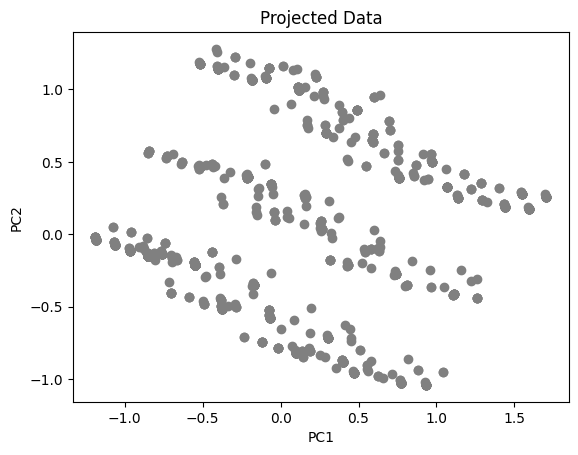

In [ ]:
# Project data onto principal components
projected_data = pca.transform(MD_x)

# Plot the projected data
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projected Data')
plt.show()

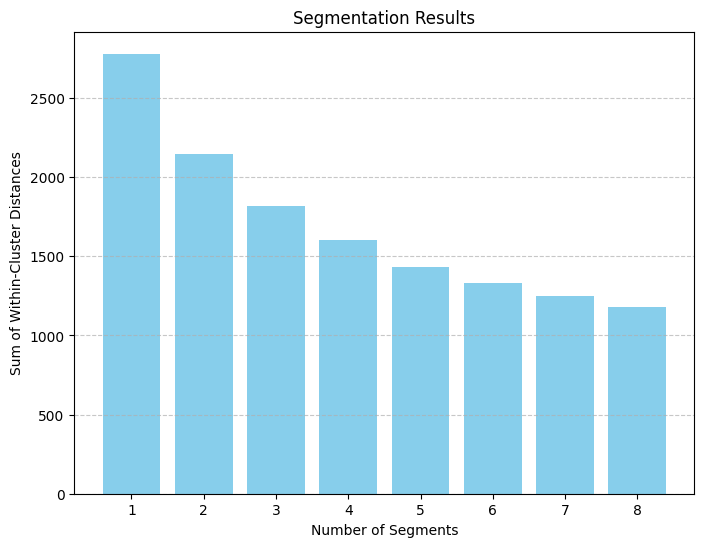

In [ ]:
np.random.seed(1234)

nrep = 10
segments = range(1, 9)

# Perform KMeans clustering for each number of segments and store results
cluster_distances = [KMeans(n_clusters=k, n_init=nrep, random_state=1234).fit(MD_x).inertia_ for k in segments]

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(segments, cluster_distances, color='skyblue')
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-Cluster Distances")
plt.title("Segmentation Results")
plt.xticks(segments)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


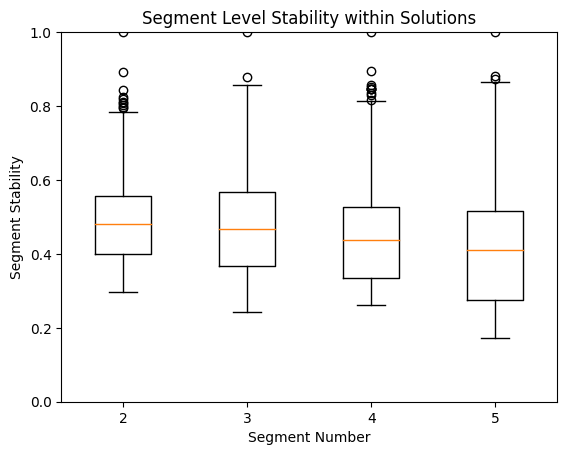

In [ ]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {segment: km28[segment].predict(MD_x) for segment in segment_solutions}
segment_similarities = {segment: km28[segment].transform(MD_x).min(axis=1) for segment in segment_solutions}

segment_stability_values = [(similarities / np.max(similarities)) for similarities in segment_similarities.values()]

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()


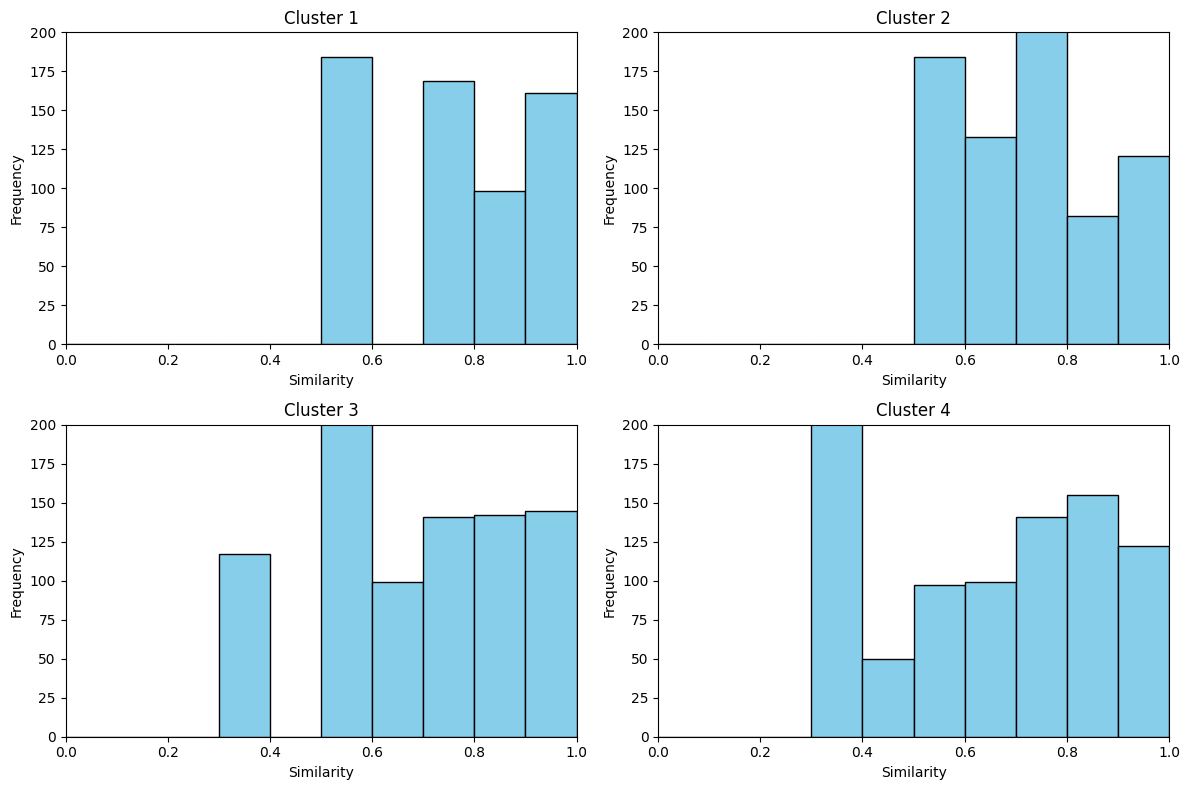

In [ ]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    cluster_number = i + 1

    labels = km28[str(cluster_number + 2)].predict(MD_x)
    similarities = km28[str(cluster_number + 2)].transform(MD_x).min(axis=1)

    ax.hist(similarities, bins=num_bins, range=range_values, color='skyblue', edgecolor='black')
    ax.set_xlabel('Similarity')
    ax.set_ylabel('Frequency')
    ax.set_title('Cluster {}'.format(cluster_number))
    ax.set_xlim(range_values)
    ax.set_ylim(0, max_frequency)
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])


plt.tight_layout()
plt.show()


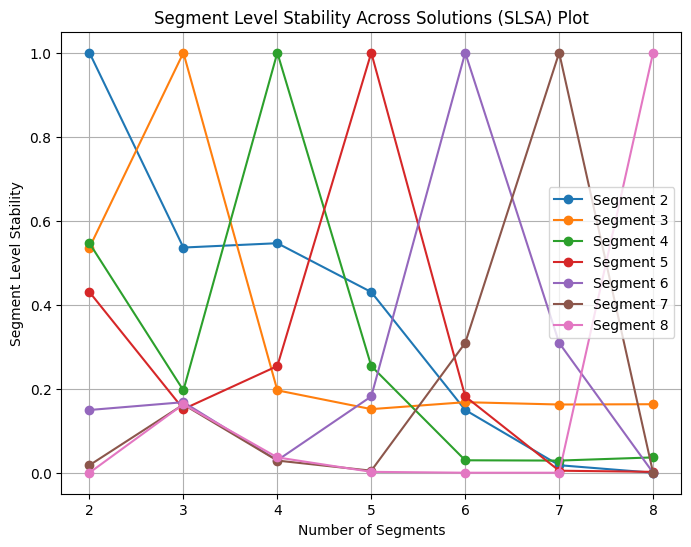

In [ ]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = km28[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234).fit(MD_x.values)
    iter_val = model.n_iter_
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    probs = np.bincount(labels) / len(labels)
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, True, k, k, log_likelihood, aic, bic, icl))

MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)



   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


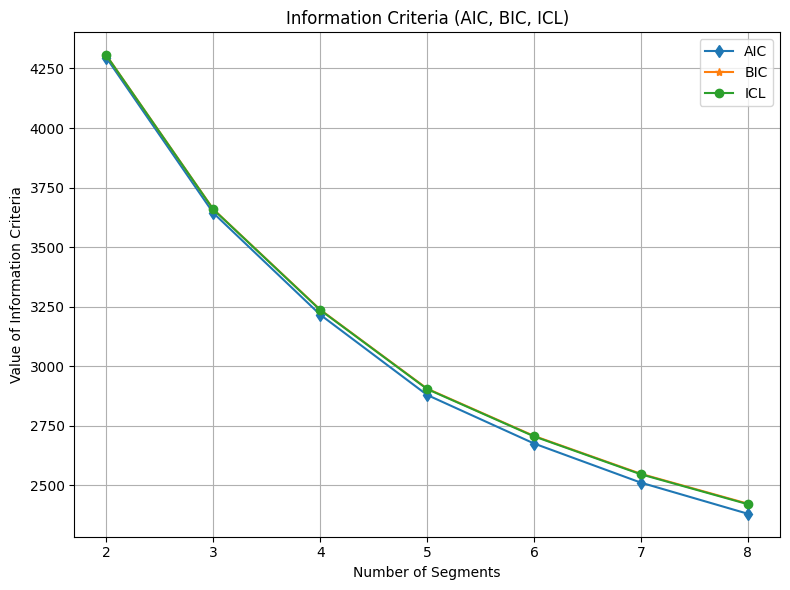

In [ ]:
num_segments, AIC_values, BIC_values, ICL_values = MD_m28["k"], MD_m28["AIC"], MD_m28["BIC"], MD_m28["ICL"]

plt.figure(figsize=(8, 6))

plt.plot(num_segments, AIC_values, 'd-', label='AIC')
plt.plot(num_segments, BIC_values, '*-', label='BIC')
plt.plot(num_segments, ICL_values, 'o-', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.mixture import GaussianMixture

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
kmeans_clusters = kmeans.labels_

# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4, random_state=1234).fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

# Creating DataFrame with clustering results
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Filtering data based on GMM cluster label
MD_m4 = MD_x[results['mixture'] == 3]

# KMeans clustering on filtered data
k4_m4 = KMeans(n_clusters=4, random_state=1234).fit(MD_m4)
k4_m4_clusters = k4_m4.labels_

# Creating DataFrame with clustering results on filtered data
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

# Printing cross-tabulation results
print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [ ]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model with 4 components
gmm_m4a = GaussianMixture(n_components=4).fit(MD_x)
log_likelihood_m4a = gmm_m4a.score(MD_x)

# Another Gaussian Mixture Model with 4 components
gmm_m4 = GaussianMixture(n_components=4).fit(MD_x)
log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)


Log-likelihood for MD.m4a: 11.727872558164462
Log-likelihood for MD.m4: 11.151316714845965


In [ ]:
like_counts = pd.value_counts(macd['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [ ]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

macd['Like.n'] = macd['Like'].map(like_mapping)


like_n_counts = macd['Like.n'].value_counts()


print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [ ]:
from patsy import dmatrices

independent_vars = macd.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=macd)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


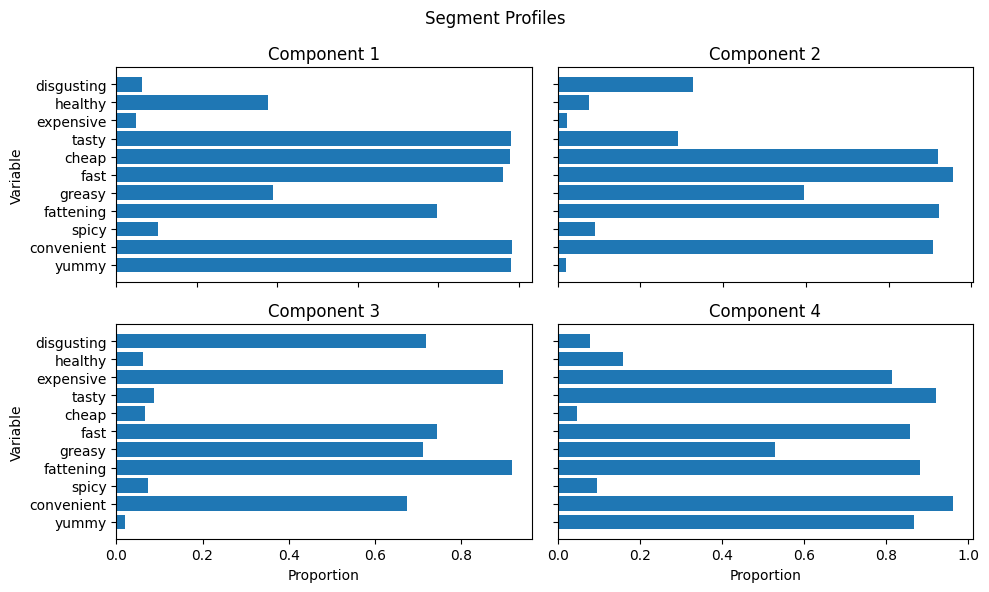

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

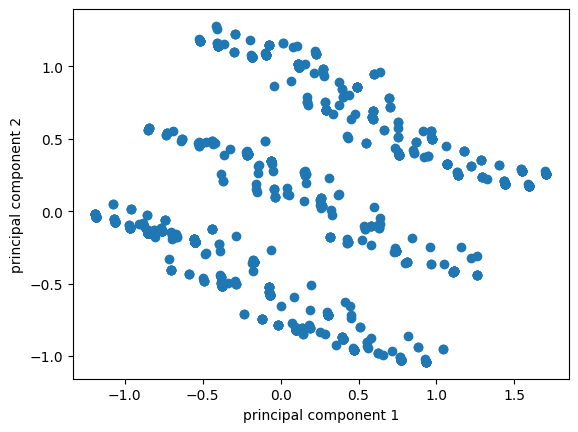

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(MD_x)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

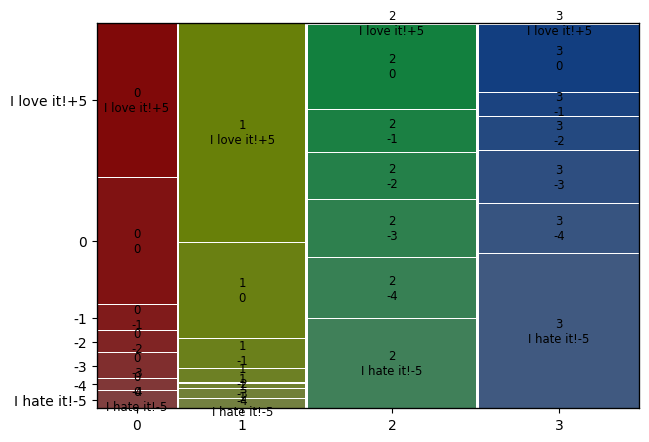

In [174]:
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.mosaicplot import mosaic

# Label encoding for categorical columns
def labelling(x):
    macd[x] = LabelEncoder().fit_transform(macd[x])

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

df_eleven = macd[cat]

# Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
macd['cluster_num'] = kmeans.labels_

# Crosstab
crosstab = pd.crosstab(macd['cluster_num'], macd['Like'].astype('str'))
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','I love it!+5']]
crosstab
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()


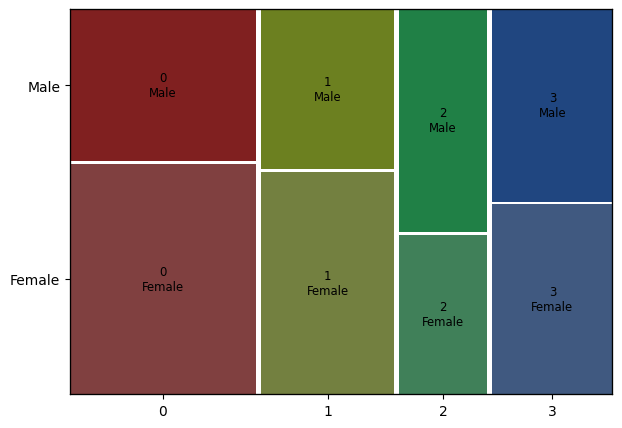

In [176]:
MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, macd['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

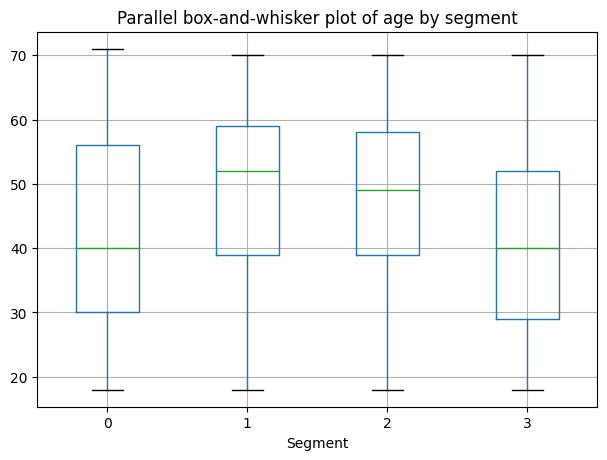

In [178]:
df = pd.DataFrame({'Segment': k4, 'Age': macd['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [180]:
macd['VisitFrequency'] = LabelEncoder().fit_transform(macd['VisitFrequency'])
visit = macd.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['cluster_num'].plot(kind='hist', bins=20, title='cluster_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['VisitFrequency'].plot(kind='hist', bins=20, title='VisitFrequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='cluster_num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='cluster_num', y='VisitFrequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['VisitFrequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('VisitFrequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster_num']
  ys = series['VisitFrequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('cluster_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_num')
_ = plt.ylabel('VisitFrequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cluster_num']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cluster_num'}, axis=1)
              .sort_values('cluster_num', ascending=True))
  xs = counted['cluster_num']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('cluster_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_num')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['cluster_num'].plot(kind='line', figsize=(8, 4), title='cluster_num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['VisitFrequency'].plot(kind='line', figsize=(8, 4), title='VisitFrequency')
plt.gca().spines[['top', 'right']].set_visible(False)

In [181]:
macd['Like'] = LabelEncoder().fit_transform(macd['Like'])
Like = macd.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [183]:
macd['Gender'] = LabelEncoder().fit_transform(macd['Gender'])
Gender = macd.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


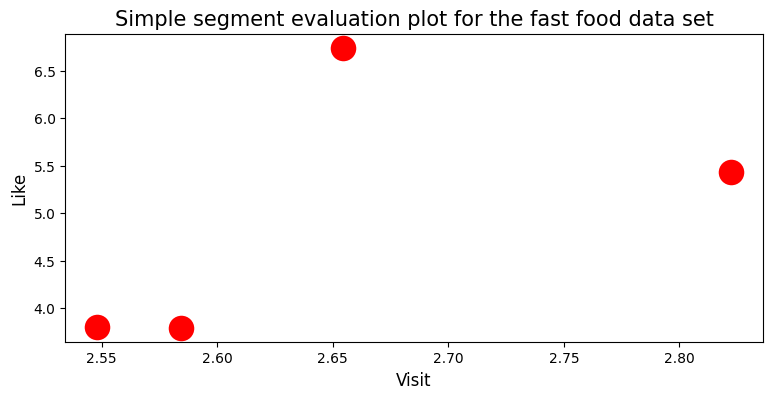

In [184]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()